# Convolution Neural Networks
<img src='images/cnns.jpeg'>

In [1]:
import torch

import numpy as np
import matplotlib.pyplot as plt

import helper

%matplotlib inline

Here we'll use the Fashion MNIST dataset which consists of greyscale clothes and shoes type. Each image is 28x28 pixels, you can see a sample below

<img src='images/fashion-mnist-sprite.png'>

In [2]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

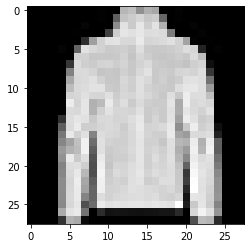

In [4]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

## Building networks with PyTorch

__torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')__

Check the PyTorch documentation [convolution-layers](https://pytorch.org/docs/stable/nn.html#convolution-layers)

In [23]:
import torch.nn as nn
import torch.nn.functional as F

In [49]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(1, 16, 4)
        self.conv2 = nn.Conv2d(16, 32, 4)
        
        self.fc1 = nn.Linear(32*4*4, 1046)
        self.fc2 = nn.Linear(1046, 512)
        self.fc3 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 32*4*4)
        x = self.fc1(x)
        x = self.fc2(x)
        x = F.log_softmax(self.fc3(x), dim=1)
        
        return x

In [50]:
model = Net()
model

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(4, 4), stride=(1, 1))
  (fc1): Linear(in_features=512, out_features=1046, bias=True)
  (fc2): Linear(in_features=1046, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
)

In [51]:
import torch.optim as optim

In [52]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

## Training the network

In [53]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 2.207926076739582
Training loss: 1.5932721763785713
Training loss: 0.9572279457725695
Training loss: 0.8133979313917505
Training loss: 0.7625761959534972


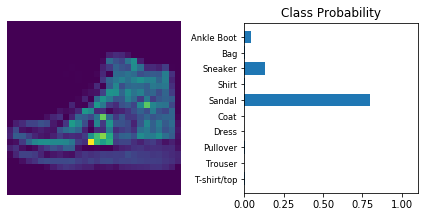

In [103]:
images, labels = next(iter(trainloader))

img = images[0].unsqueeze(1)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')

# Save the Trained Model

In [96]:
torch.save(model.state_dict(), 'cnn_model.pt')

In [97]:
model.load_state_dict(torch.load('cnn_model.pt'))

<All keys matched successfully>

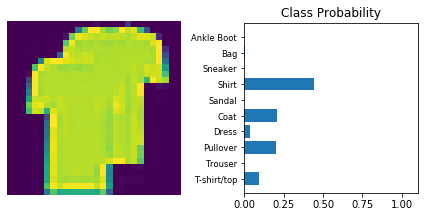

In [104]:
images, labels = next(iter(trainloader))

img = images[0].unsqueeze(1)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')